<a href="https://colab.research.google.com/github/DharmarajSoundatte/OIBSIP/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.drop(columns=["Unnamed: 0"], axis=1,inplace=True)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
# Split the dataset into training and testing sets
features=["TV","Radio","Newspaper"]
X=df[features]
target="Sales"
y=df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Build the model
y_mean=y_train.mean()
print("Mean Error :",y_mean)
y_pred_baseline =[y_mean]*len(y_train)
print("Baseline error :",y_pred_baseline[:5])
mae_baseline=mean_absolute_error(y_train,y_pred_baseline)
print("Mae_baseline:",mae_baseline)

Mean Error : 14.1
Baseline error : [14.1, 14.1, 14.1, 14.1, 14.1]
Mae_baseline: 4.12


In [11]:
lr=LinearRegression().fit(X_train,y_train)
lr

LinearRegression()

In [17]:
#predictions on testing data
y_pred_training=lr.predict(X_train)
y_pred_training[:5]


array([ 9.68827502, 12.67337707, 10.0553326 ,  8.20010235, 13.49562077])

In [18]:
mae_pred_training=mean_absolute_error(y_train,y_pred_training)
mae_pred_training

1.1984678961500137

In [19]:
y_pred_test=lr.predict(X_test)
y_pred_test[:5]

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326])

In [21]:
mae_pred_test=mean_absolute_error(y_test,y_pred_test)
mae_pred_test


1.4607567168117603

In [23]:
#Extract intercept
intercept=lr.intercept_
intercept

2.979067338122629

In [25]:
#Extract Coefficient
coefficient =lr.coef_
coefficient

array([0.04472952, 0.18919505, 0.00276111])

In [28]:
print(f"Sales ={intercept}={coefficient[0]}*TV+{coefficient[1]}*Radio+{coefficient[2]}*Newspaper")

Sales =2.979067338122629=0.044729517468716326*TV+0.18919505423437652*Radio+0.0027611143413671935*Newspaper


In [31]:
print("Score of training data :",lr.score(X_train,y_train))
print("Score of test data :",lr.score(X_train,y_train))

Score of training data : 0.8957008271017818
Score of test data : 0.8957008271017818


Text(0.5, 1.0, 'Actual vs predicted[Training Data]')

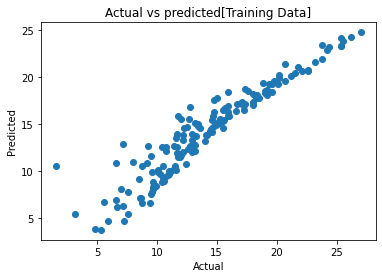

In [33]:
#Training data
plt.scatter(y_train,y_pred_training)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted[Training Data]")

Text(0.5, 1.0, 'Actual vs predicted[Test Data]')

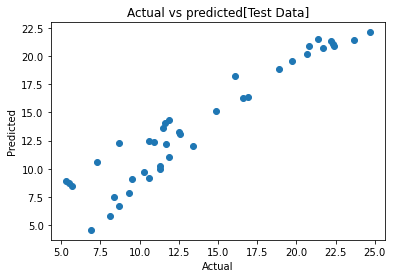

In [34]:
#Training data
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted[Test Data]")

In [35]:
y_pred_test_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_test})
y_pred_test_df.head()

,Actual,Predicted
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
